# Web Mining and Applied NLP (44-620)

## Final Project: Article Summarizer

### Student Name: Sarah Windeknecht
https://github.com/sarahwind/article-summarizer

Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

You should bring in code from previous assignments to help you answer the questions below.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

#### QUESTION 1

1. Find on the internet an article or blog post about a topic that interests you and you are able to get the text for using the technologies we have applied in the course.  Get the html for the article and store it in a file (which you must submit with your project)

In [6]:
import requests

article_html = requests.get('https://www.lazygirlrunning.com/2022/01/new-year-plans-just-keep-moving.html')

import pickle

with open('python-match.pkl', 'wb') as f:
    pickle.dump(article_html.text, f)
    
with open('python-match.pkl', 'rb') as f:
    article_html = pickle.load(f)

#### QUESTION 2

2. Read in your article's html source from the file you created in question 1 and do sentiment analysis on the article/post's text (use `.get_text()`).  Print the polarity score with an appropriate label.  Additionally print the number of sentences in the original article (with an appropriate label)

In [7]:
from bs4 import BeautifulSoup
parser = 'html.parser'

soup = BeautifulSoup(article_html, parser)

article_element = soup.find('article')

#print(article_element.get_text())

import spacy
from spacytextblob.spacytextblob import SpacyTextBlob

nlp = spacy.load('en_core_web_sm')
nlp.add_pipe('spacytextblob')
doc = nlp(article_element.get_text())
print(f'Polarity: {doc._.polarity}')

num_sents = len(list(doc.sents))
print('Number of sentences: ', num_sents)

Polarity: 0.14058025308025307
Number of sentences:  34


#### QUESTION 3

3. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels)

In [8]:
nlp = spacy.load('en_core_web_sm')
nlp.add_pipe('spacytextblob')
doc = nlp(article_element.get_text())

from collections import Counter

def cool_tokens(token):
    return not (token.is_space or token.is_punct or token.is_stop)

all_tokens = [token.text.lower() for token in doc if cool_tokens(token)]
word_freq = Counter(all_tokens)
five_tokens = word_freq.most_common(5)

common_tokens = []
common_freq = []
    
for (token, freq) in five_tokens:
    common_tokens.append(token)
    common_freq.append(freq)

print('Most common tokens: ', common_tokens)
print('Token frequencies: ', five_tokens)


Most common tokens:  ['year', 'marathon', 'moving', 'run', 'bike']
Token frequencies:  [('year', 8), ('marathon', 8), ('moving', 6), ('run', 5), ('bike', 5)]


#### QUESTION 4

4. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels).

In [9]:
nlp = spacy.load('en_core_web_sm')
nlp.add_pipe('spacytextblob')
doc = nlp(article_element.get_text())

from collections import Counter

def cool_lemmas(token):
    return not (token.is_space or token.is_punct or token.is_stop)

all_lemmas = [token.lemma_.lower() for token in doc if cool_lemmas(token)]
lemma_freq = Counter(all_lemmas)
five_lemmas = lemma_freq.most_common(5)

common_lemmas = []
common_lemma_freq = []
    
for (lemma, freq2) in five_lemmas:
    common_lemmas.append(lemma)
    common_lemma_freq.append(freq2)

print('Most common lemmas: ', common_lemmas)
print('Lemma frequencies: ', five_lemmas)

Most common lemmas:  ['year', 'marathon', 'move', 'run', 'bike']
Lemma frequencies:  [('year', 8), ('marathon', 8), ('move', 6), ('run', 5), ('bike', 5)]


#### QUESTION 5

5. Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

Token scores:  [0.1875, 0.15384615384615385, 0.125, 0.0, 0.04, 0.07142857142857142, 0.0, 0.0, 0.0, 0.0, 0.044444444444444446, 0.041666666666666664, 0.0, 0.0, 0.06451612903225806, 0.0, 0.0, 0.06666666666666667, 0.0, 0.0, 0.06666666666666667, 0.0, 0.0, 0.0, 0.0, 0.0, 0.05555555555555555, 0.043478260869565216, 0.02631578947368421, 0.13333333333333333, 0.0, 0.0, 0.0, 0.05063291139240506]


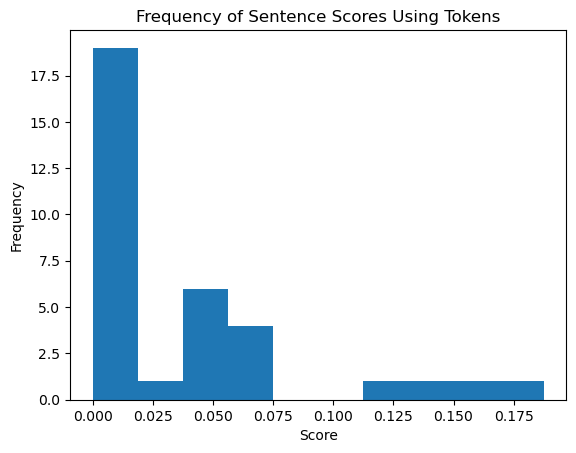

In [10]:
def wordCount(sentence):
    count = 0
    for token in sentence:
        if not(token.is_space or token.is_punct):
            count += 1
    return count

def score_sentence_by_token(sentence, interesting_tokens):
    count2 = 0
    for token in sentence:
        if token.text.lower() in interesting_tokens:
            count2 += 1
    total = wordCount(sentence)
    #print('Output: score_sentence_by_token: ',count2,'/',total)
    return count2/total

scores = []

for sentence in list(doc.sents):
    scores.append(score_sentence_by_token(sentence, common_tokens))
    
print('Token scores: ', scores)

#c = Counter(scores)

#frequency = list(c.values())

#print('Frequencies: ', frequency)

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

plt.hist(scores)
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.title("Frequency of Sentence Scores Using Tokens")
plt.show()

#most common range of scores is 0.000-0.020

#### QUESTION 6

6. Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

Lemma scores:  [0.125, 0.07692307692307693, 0.125, 0.0, 0.04, 0.07142857142857142, 0.0, 0.0, 0.0, 0.0, 0.044444444444444446, 0.0, 0.0, 0.0, 0.06451612903225806, 0.0, 0.0, 0.06666666666666667, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.05555555555555555, 0.043478260869565216, 0.02631578947368421, 0.1, 0.0, 0.0, 0.0, 0.05063291139240506]


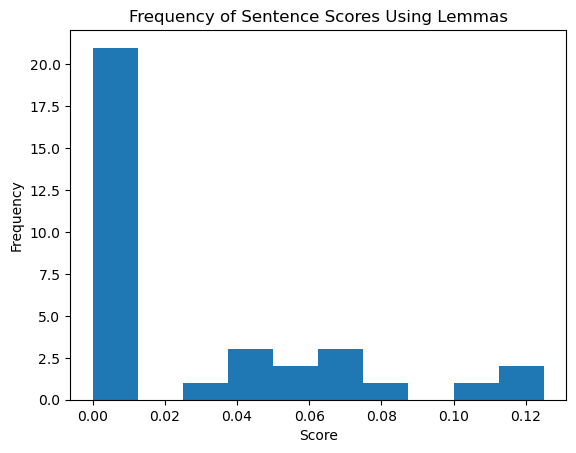

In [67]:
def score_sentence_by_lemma(sentence, interesting_lemmas):
    count3 = 0
    for token in sentence:
        if token.lemma_.lower() in interesting_lemmas:
            count3 += 1
    total = wordCount(sentence)
    #print('Output: score_sentence_by_lemma: ',count3,'/',total)
    return count3/total

scores_lemma = []

for sentence in list(doc.sents):
    scores_lemma.append(score_sentence_by_token(sentence, common_lemmas))
    
print('Lemma scores: ', scores_lemma)

#c2 = Counter(scores_lemma)

#frequency_lemma = list(c2.values())

#print('Frequencies: ', frequency_lemma)

plt.hist(scores_lemma) 
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.title("Frequency of Sentence Scores Using Lemmas")
plt.show()

#most common range of scores is 0.00-0.01

#### QUESTION 7

7. Using the histograms from questions 5 and 6, decide a "cutoff" score for tokens and lemmas such that fewer than half the sentences would have a score greater than the cutoff score.  Record the scores in this Markdown cell

* Cutoff Score (tokens): 0.06
* Cutoff Score (lemmas): 0.06

Feel free to change these scores as you generate your summaries.  Ideally, we're shooting for at least 6 sentences for our summary, but don't want more than 10 (these numbers are rough estimates; they depend on the length of your article).

#### QUESTION 8

8. Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on tokens) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

In [78]:
summary1 = []

for sentence in list(doc.sents):
    if score_sentence_by_token(sentence, common_tokens) > 0.06:
        summary1.append(sentence)
    
token_summary = [i.text.strip() for i in summary1]
tokens_summary = ' '.join(token_summary)

print(tokens_summary)

New Year Plans: Just Keep Moving

New Year Plans: Just Keep Moving
My New Year’s goal isn’t to hit any massive mileage targets or to run every day in January. This year I’m keeping it simple with a mantra ‘Just keep moving’. That movement might be a run (after all, I’m hoping to run a marathon this year), but equally it might be 20 mins of yoga or a walk around the reservoir. There’s a lot of pressure to start the year with a big challenge. It’s great to have goals, and maybe yours IS to run a marathon or a 10k or some sort of race that’s going to be a challenge for you. If you’re dedicating your year to achieving something, it should be something you enjoy. The key to keeping moving is to find what you do and don’t like. I might not be signing up for a 100-mile bike ride again, but the bike will definitely feature more in the ways I keep my body moving this year.


#### QUESTION 9

9. Print the polarity score of your summary you generated with the token scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

In [92]:
doc1 = nlp(tokens_summary)

print(f'Polarity: {doc1._.polarity}')

num_sents = len(token_summary)
print('Number of sentences: ', num_sents)

Polarity: 0.17575757575757575
Number of sentences:  8


#### QUESTION 10

10. Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on lemmas) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

In [93]:
summary2 = []

for sentence in list(doc.sents):
    if score_sentence_by_lemma(sentence, common_lemmas) > 0.06:
        summary2.append(sentence)
    
lemma_summary = [i.text.strip() for i in summary2]
lemmas_summary = ' '.join(lemma_summary)

print(lemmas_summary)

New Year Plans: Just Keep Moving

New Year Plans: Just Keep Moving
My New Year’s goal isn’t to hit any massive mileage targets or to run every day in January. This year I’m keeping it simple with a mantra ‘Just keep moving’. That movement might be a run (after all, I’m hoping to run a marathon this year), but equally it might be 20 mins of yoga or a walk around the reservoir. There’s a lot of pressure to start the year with a big challenge. It’s great to have goals, and maybe yours IS to run a marathon or a 10k or some sort of race that’s going to be a challenge for you. If you’re dedicating your year to achieving something, it should be something you enjoy. The key to keeping moving is to find what you do and don’t like. I might not be signing up for a 100-mile bike ride again, but the bike will definitely feature more in the ways I keep my body moving this year.


#### QUESTION 11

11. Print the polarity score of your summary you generated with the lemma scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

In [94]:
doc2 = nlp(lemmas_summary)

print(f'Polarity: {doc2._.polarity}')

numb_sents = len(lemma_summary)
print('Number of sentences: ', numb_sents)

Polarity: 0.17575757575757575
Number of sentences:  8


#### QUESTION 12

12.  Compare your polarity scores of your summaries to the polarity scores of the initial article.  Is there a difference?  Why do you think that may or may not be?.  Answer in this Markdown cell.  

Initial article polarity score = 0.14
Summary scores = 0.18

The polarity scores of the summaries are greater than the initial summary score. In using a cutoff score, we eliminate the sentences with less positive polarity scores, leaving those with higher scores.

#### QUESTION 13

13. Based on your reading of the original article, which summary do you think is better (if there's a difference).  Why do you think this might be?

Both summaries are the same.